# Handwritten digits

Here we're going to use the MNIST database. This contains a set of images with handwritten digts. It is one of the most widely used and best studied datasets in the whole of machine learning. It's part of the standard tests new tecniques need to face.

In [72]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
digits = datasets.load_digits()
print(digits.images.shape)
print(digits.keys())

(1797, 8, 8)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [7]:
print(digits.data.shape)

# The images themselves
print(digits.images[0])

# The data for use in our algorithms
print(digits.data[0])

# The labels
print(digits.target)
print(digits.target[0])

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[0 1 2 ... 8 9 8]
0


## Part 1
We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to plot points in N=64 dimensions! So we need to reduce the dimensionality of the space.
1. Use the unsupervised dimensionality reduction technique called Isomap. Isomap is an embedding tecnique, which tries to understand if your N dimensional datapoint live in a N dimensional (with  N<M) manyfold. Have a look at the Isomap documentation and reduce the MINST dataset. Do some plots to visualize your results.NST

In [34]:
isomap = Isomap(n_components=2) #we have 64 dimensions, we want to reduce it to 2 dimensions 
X = digits.data     # Shape: (1797, 64) -> 1797 images (arrays), 8x8=64 pixels (dimensions)
target = digits.target     # Real labels
X_tr = isomap.fit_transform(X) #Adapt the model to data and project them in the 2D space, X_tr is array with the original data projected in 2D space
X_tr.shape #Show the shape of X_tr that should be (1787,2)

C:\Users\ISAFA\anaconda3\Lib\site-packages\sklearn\manifold\_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\ISAFA\anaconda3\Lib\site-packages\scipy\sparse\_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

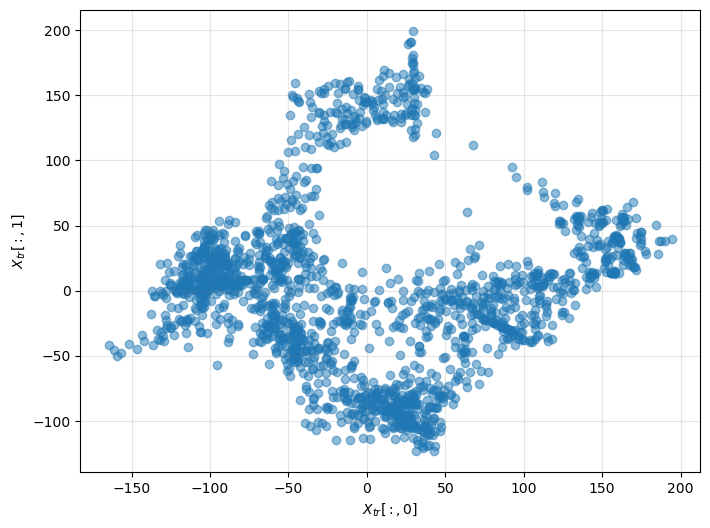

In [40]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
ax.grid(c='grey', alpha = 0.2)

ax.set_xlabel('$X_{tr}[:, 0]$')
ax.set_ylabel('$X_{tr}[:, 1]$')
ax.scatter(X_tr[:, 0], X_tr[:, 1], alpha = 0.5)

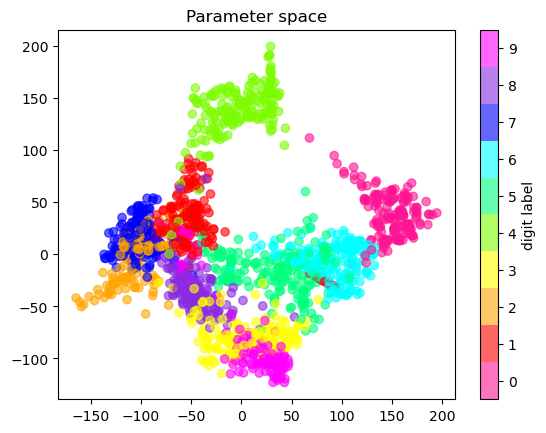

In [86]:
colors = ['deeppink', 'red', 'orange', 'yellow', 'lawngreen', 'springgreen', 'cyan', 'blue', 'blueviolet', 'magenta']
custom_cmap = ListedColormap(colors)

plt.scatter(X_tr[:, 0], X_tr[:, 1], c=target, cmap=custom_cmap, alpha=0.6)
plt.title('Parameter space')
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

Digits seem to be well separated, so hopefully the classification algorithm should work correctly.

## Part 2
Now we want to classify the dataset.
1. Split the dataset taking 80% of the images as training dataset and leaving the other 20% as a validation set. You need: sklearn.model_selection.train_test_split
2. Use a simple Logistic Regression which despite its name is a common classification algorithm. (I know, this is confusing!). Use the flag solver='sag' (I found the default solver had a bug, at least when I tried).
3. Compute the accuracy (sklearn.metrics.accuracy_score) of your emulator. In this context, accuracy is simply the fraction of the digits that were correctly identified. Compute the accuracy on both the training and the validation set. Comment on the results.
4. The accuracy is a single number doesn't tell us where we've gone wrong. Plot the confusion matrix as we did above. What are the digits that are more challenging to identify, does it make sense?

In [79]:
#Taking 80% of the dataset as traninig dataset, 20% as validation set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) #X=data, Y=target
print(X_train.shape, X_test.shape)

(1437, 64) (360, 64)


In [76]:
model = LogisticRegression(penalty='l2',solver='sag', max_iter=2000)
model.fit(X_train, Y_train) #Train the model with the training set

LogisticRegression(max_iter=2000, solver='sag')

In [82]:
Y_pred_v = model.predict(X_test) #Predict the labels on the validation set, returns the learned label for each object of the validation set
Y_pred_t = model.predict(X_train) #The same for the training set

#Evaluate the accuracy
accuracy_v = accuracy_score(Y_test, Y_pred)
print("Accuracy for validation set:", accuracy_v)
accuracy_t = accuracy_score(Y_train, Y_pred_t)
print("Accuracy for training set:", accuracy_t)

Accuracy for validation set: 0.9722222222222222
Accuracy for training set: 1.0


In [83]:
#Confusion matrix for the validation dataset
print(confusion_matrix(Y_test, Y_pred_v))

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  1 38]]


As we can observe the classification is quiete good, we have some ploblems in classification: 4 is wrongly predicted to be 1 in one case and 6 in one case, 5 is wrongly predicted to be 6 and 9 in one case and so on. 

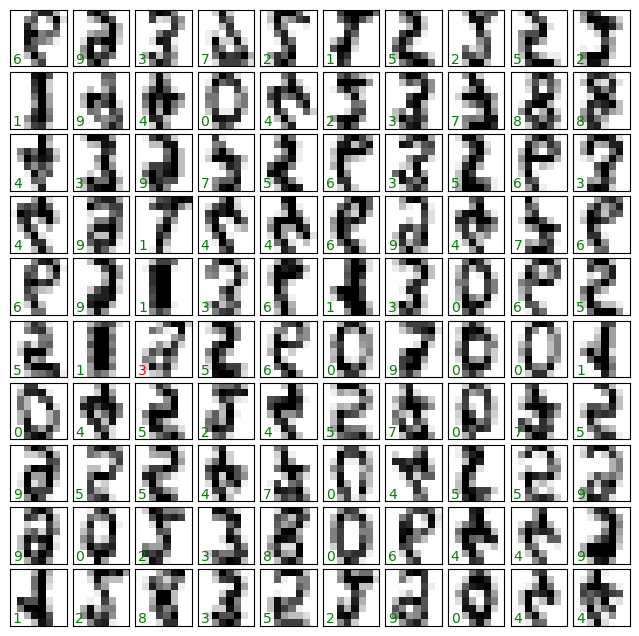

In [75]:
#Now we show the wronf number in red and the good one in green 
fig2, axes = plt.subplots(10, 10, figsize=(8, 8))
fig2.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax2 in enumerate(axes.flat):
    ax2.imshow(np.flipud(X_test[i].reshape(8, 8)), cmap='binary')
    ax2.text(0.05, 0.05, str(Y_pred_v[i]), transform=ax2.transAxes, 
            color='green' if (Y_test[i] == Y_pred_v[i]) else 'red')
    ax2.set_xticks([])
    ax2.set_yticks([])

In [84]:
#controllare perchè dia solo un numero sbagliato, mi sembra un po strano
